# 

In [1]:
#Jan Kaltenegger
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(21613, 21)

In [6]:
print('Number of rows', df.shape[0])
print('Number of columns', df.shape[1])

Number of rows 21613
Number of columns 21


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
sample= df.sample(6)
print(sample)

               id             date      price  bedrooms  bathrooms  \
15481  8956500020  20140818T000000   338000.0         3       2.50   
4286   9264921140  20150312T000000   300000.0         3       2.75   
9719    193600200  20140619T000000   440000.0         3       1.75   
21166  4457300005  20150325T000000  1839900.0         4       3.25   
17766  2922701175  20140919T000000   535000.0         2       1.50   
19975  6056100165  20141201T000000   175003.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15481         1590      7819     2.0           0     0  ...      7   
4286          1910     15508     1.0           0     0  ...      8   
9719          1170      8740     1.0           0     0  ...      7   
21166         4140     11007     2.0           0     0  ...     10   
17766         1940      5700     1.0           0     0  ...      7   
19975         1390      1882     2.0           0     0  ...      7   

       sqft_above 

In [10]:
price=df['price']
print(price)
type(price)
price.shape

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


(21613,)

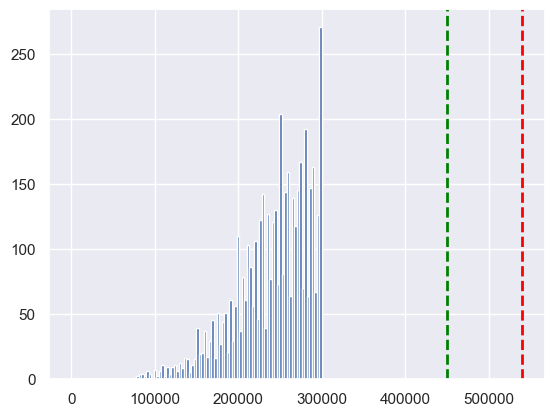

In [12]:
%matplotlib inline
import seaborn as sns; sns.set()
plt.hist(price, range=(0,300000), bins=100)
plt.axvline(price.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(price.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [13]:
df.iloc[0]

id                    7129300520
date             20141013T000000
price                   221900.0
bedrooms                       3
bathrooms                    1.0
sqft_living                 1180
sqft_lot                    5650
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1180
sqft_basement                  0
yr_built                    1955
yr_renovated                   0
zipcode                    98178
lat                      47.5112
long                    -122.257
sqft_living15               1340
sqft_lot15                  5650
Name: 0, dtype: object

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
x = df[['sqft_living']]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [20]:
type(x) 

pandas.core.frame.DataFrame

In [21]:
x.shape

(21613, 1)

In [22]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_train shape: {x_test.shape}')
print(f'y_train shape: {y_test.shape}')

Text(0, 0.5, 'Price ($)')

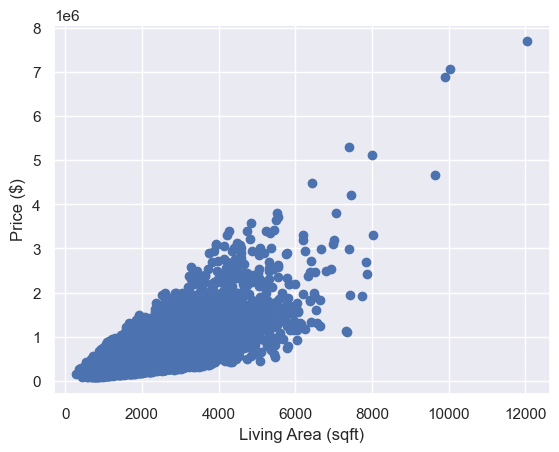

In [31]:
plt.scatter(x_train, y_train)
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
round(lr.intercept_)

-41999

In [42]:
round(lr.coef_[0])

280

In [45]:
x_sample = x_train.iloc[:3]
x_sample

,sqft_living
6325,1780
13473,1000
17614,1080


In [50]:
lr.predict(x_sample).round()

array([455608., 237556., 259920.])

In [51]:
y_sample = y_train.iloc[:3]
y_sample

6325     325000.0
13473    257000.0
17614    228500.0
Name: price, dtype: float64

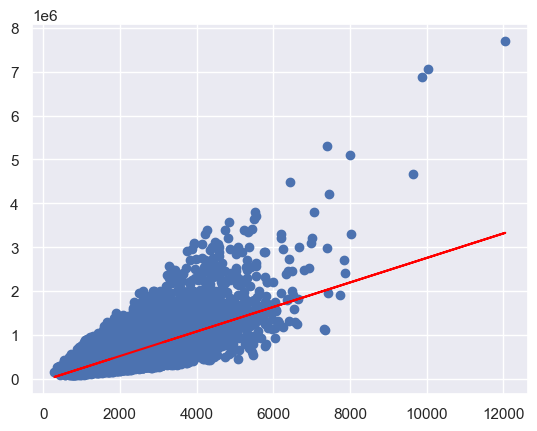

In [57]:
plt.scatter(x_train, y_train)
plt.xlabel('Living Area (sqft)')
plt.plot(x_train, lr.predict(x_train), color='red')